<a href="https://colab.research.google.com/github/Shashank-u803/BIS-Lab/blob/main/BIS_CIE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bio Inspired System Lab CIE

Name: Shashank U

USN: 1BM23CS314

Application: Pollution Optimization

Algorithm used: Genetic Algorithm

GA chosen because penalty-based fitness handles conflicting constraints without breaking convergence.

Enter objective f(x): x*math.sin(x) + 12*(x**2)
Enter constraints g(x)<=0 separated by commas (or leave empty): x -1, -x-2
Best x: -2.608700618397342
Objective f(x): 82.98911602104945
Penalty: 0.3705164428373066
Final fitness: 64.46329387918412


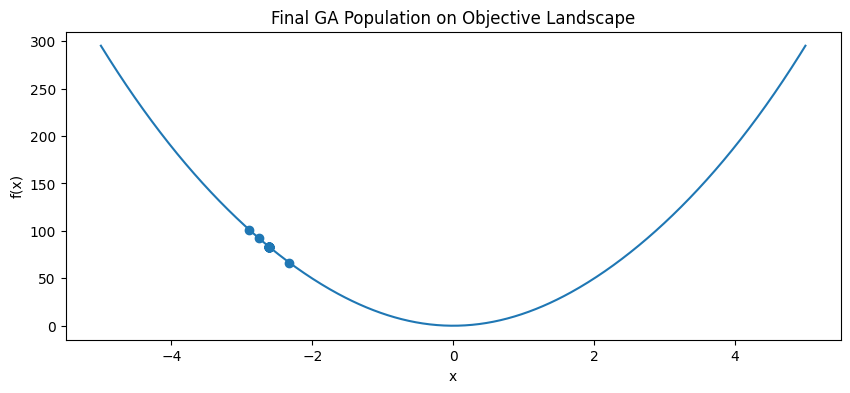

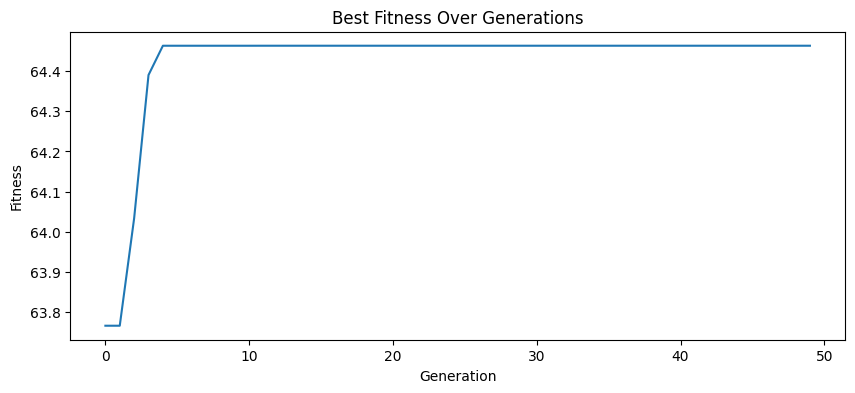

In [7]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np

print("GA chosen because penalty-based fitness handles conflicting constraints without breaking convergence.\n")

# objective
obj_expr = input("Enter objective f(x): ")

# constraint expressions, comma-separated
# each constraint g(x) <= 0 is considered satisfied
con_exprs_raw = input("Enter constraints g(x)<=0 separated by commas (or leave empty): ")

constraints = []
if con_exprs_raw.strip() != "":
    for c in con_exprs_raw.split(","):
        constraints.append(c.strip())

def f_obj(x):
    return eval(obj_expr, {"x": x, "math": math})

def constraint_penalty(x):
    pen = 0
    for c in constraints:
        g = eval(c, {"x": x, "math": math})
        if g > 0:
            pen += g**2
    return pen

def fitness(x):
    return f_obj(x) - 50*constraint_penalty(x)

POP_SIZE = 40
MUT_RATE = 0.1
CROSS_RATE = 0.8
GENERATIONS = 50
X_MIN, X_MAX = -5, 5

def create_individual():
    return random.uniform(X_MIN, X_MAX)

def select(pop):
    a, b = random.sample(pop, 2)
    return a if fitness(a) > fitness(b) else b

def crossover(p1, p2):
    if random.random() < CROSS_RATE:
        w = random.random()
        return w*p1 + (1-w)*p2
    return p1

def mutate(x):
    if random.random() < MUT_RATE:
        x += random.uniform(-0.3, 0.3)
    return max(min(x, X_MAX), X_MIN)

population = [create_individual() for _ in range(POP_SIZE)]
best = max(population, key=fitness)
best_vals = []

for _ in range(GENERATIONS):
    new_pop = []
    for _ in range(POP_SIZE):
        p1 = select(population)
        p2 = select(population)
        child = mutate(crossover(p1, p2))
        new_pop.append(child)
    population = new_pop
    curr = max(population, key=fitness)
    if fitness(curr) > fitness(best):
        best = curr
    best_vals.append(fitness(best))

print("Best x:", best)
print("Objective f(x):", f_obj(best))
print("Penalty:", constraint_penalty(best))
print("Final fitness:", fitness(best))

xs = np.linspace(X_MIN, X_MAX, 500)
ys = [f_obj(x) for x in xs]

plt.figure(figsize=(10,4))
plt.plot(xs, ys)
plt.scatter(population, [f_obj(i) for i in population])
plt.title("Final GA Population on Objective Landscape")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

plt.figure(figsize=(10,4))
plt.plot(best_vals)
plt.title("Best Fitness Over Generations")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.show()
